<a href="https://colab.research.google.com/github/namangarg1805/Data-Analytics/blob/main/AerofitCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ABC Case Study

The market research team at ABC wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each ABC treadmill product by developing appropriate tables and charts.


For each ABC treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

In [ ]:
raw_data = pd.read_csv('abc_fitness.csv')

In [ ]:
raw_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
raw_data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
raw_data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
raw_data.duplicated().sum()

0

In [ ]:
raw_data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
raw_data.shape

(180, 9)

1. No Null Values
2. No duplicates
3. convert gender,marital status to category types(ask TA)

In [ ]:
new_data=raw_data.copy()

In [ ]:
new_data['Gender'] = new_data['Gender'].astype('category')
new_data['MaritalStatus'] = new_data['MaritalStatus'].astype('category')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(2), int64(6), object(1)
memory usage: 10.6+ KB


In [ ]:
new_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**Q1. Contingency table of Product and Gender.**

In [ ]:
cont1 = pd.crosstab(new_data['Product'],new_data['Gender'])
cont1

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [ ]:
#probability of product given that person is male or female
cp_prod_person = pd.crosstab(new_data['Product'],new_data['Gender'],normalize='columns')
cp_prod_person

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


In [ ]:
#probability of person when product is given.
cp_person_prod = pd.crosstab(new_data['Product'],new_data['Gender'],normalize='index')
cp_person_prod

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


**Business Insight 1**
1. KP281 is equally popular among both Male and Female
2. KP281 is purchased by most of customers as compared to other products.
3. KP781 is more popular among Males as compared to Females
but is least preferred among other products

**Q2. Contingency table of Product and Marital Status.**

In [ ]:
cont2 = pd.crosstab(new_data['Product'],new_data['MaritalStatus'])
cont2

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


In [ ]:
cp_prod_status=pd.crosstab(new_data['Product'],new_data['MaritalStatus'],normalize='columns')
cp_prod_status

MaritalStatus,Partnered,Single
Product,,
KP281,0.448598,0.438356
KP481,0.336449,0.328767
KP781,0.214953,0.232877


In [ ]:
cp_status_prod=pd.crosstab(new_data['Product'],new_data['MaritalStatus'],normalize='index')
cp_status_prod

MaritalStatus,Partnered,Single
Product,,
KP281,0.600,0.400
KP481,0.600,0.400
KP781,0.575,0.425


**Business Insight 2**
1. KP281 is favorite choice of both married and single person among other products
2. There is high probability that treadmil is purchased by married person.

**Q3. Contingency table of Product and Age.**

In [ ]:
#segmenting and categorizing the age.
new_data['Age_Cat(yrs)'] = pd.cut(new_data['Age'],bins=[17,28,38,51],labels=['18-28','28-38','38-51'])
new_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Cat(yrs)
0,KP281,18,Male,14,Single,3,4,29562,112,18-28
1,KP281,19,Male,15,Single,2,3,31836,75,18-28
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-28
3,KP281,19,Male,12,Single,3,3,32973,85,18-28
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-28


In [ ]:
cont3 = pd.crosstab(new_data['Product'],new_data['Age_Cat(yrs)'])
cont3

Age_Cat(yrs),18-28,28-38,38-51
Product,,,
KP281,50,22,8
KP481,32,23,5
KP781,25,10,5


In [ ]:
cp_prod_age = pd.crosstab(new_data['Product'],new_data['Age_Cat(yrs)'],normalize='columns')
cp_prod_age

Age_Cat(yrs),18-28,28-38,38-51
Product,,,
KP281,0.467290,0.400000,0.444444
KP481,0.299065,0.418182,0.277778
KP781,0.233645,0.181818,0.277778


In [ ]:
cp_age_prod = pd.crosstab(new_data['Product'],new_data['Age_Cat(yrs)'],normalize='index')
cp_age_prod

Age_Cat(yrs),18-28,28-38,38-51
Product,,,
KP281,0.625000,0.275000,0.100000
KP481,0.533333,0.383333,0.083333
KP781,0.625000,0.250000,0.125000


**Business Insight 3**
1. KP281 is more popular among all age groups except KP481 is slighlty more popular among the people with age group 28 to 38 yrs.

**Q4. Contingency table of Product and Income.**

In [ ]:
#segmenting and categorizing the income
new_data['Income_Cat(In Thousands)'] = pd.cut(new_data['Income'],bins=[25000,50000,75000,110000],labels=['25-50','50-75','75-110'])
new_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Cat(yrs),Income_Cat(In Thousands)
0,KP281,18,Male,14,Single,3,4,29562,112,18-28,25-50
1,KP281,19,Male,15,Single,2,3,31836,75,18-28,25-50
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-28,25-50
3,KP281,19,Male,12,Single,3,3,32973,85,18-28,25-50
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-28,25-50


In [ ]:
cont4 = pd.crosstab(new_data['Product'],new_data['Income_Cat(In Thousands)'])
cont4

Income_Cat(In Thousands),25-50,50-75,75-110
Product,,,
KP281,48,32,0
KP481,30,30,0
KP781,5,14,21


In [ ]:
cp_prod_income = pd.crosstab(new_data['Product'],new_data['Income_Cat(In Thousands)'],normalize='columns')
cp_prod_income

Income_Cat(In Thousands),25-50,50-75,75-110
Product,,,
KP281,0.578313,0.421053,0.0
KP481,0.361446,0.394737,0.0
KP781,0.060241,0.184211,1.0


In [ ]:
cp_income_prod = pd.crosstab(new_data['Product'],new_data['Income_Cat(In Thousands)'],normalize='index')
cp_income_prod

Income_Cat(In Thousands),25-50,50-75,75-110
Product,,,
KP281,0.600,0.40,0.000
KP481,0.500,0.50,0.000
KP781,0.125,0.35,0.525


**Business Insight 4**
1. KP281 is favorite choice of both married and single person among other products
2. There is high probability that KP781 is purchased by person having income between 75000 and 110000.
3. There is high probability that KP281 is purchased by person having income between 25000 to 50000.

**Q5. Marginal Probabilities of All.**

In [ ]:
mp_gender=new_data['Gender'].value_counts(normalize=True)
mp_gender

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [ ]:
mp_product=new_data['Product'].value_counts(normalize=True)
mp_product

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [ ]:
mp_maritalstatus=new_data['MaritalStatus'].value_counts(normalize=True)
mp_maritalstatus

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

In [ ]:
mp_fitness=new_data['Fitness'].value_counts(normalize=True)
mp_fitness

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

In [ ]:
mp_income=new_data['Income_Cat(In Thousands)'].value_counts(normalize=True)
mp_income

25-50     0.461111
50-75     0.422222
75-110    0.116667
Name: Income_Cat(In Thousands), dtype: float64

In [ ]:
mp_age=new_data['Age_Cat(yrs)'].value_counts(normalize=True)
mp_age

18-28    0.594444
28-38    0.305556
38-51    0.100000
Name: Age_Cat(yrs), dtype: float64

**Business Insight 5**
1. There is high chance of random person chosen being Male.
2. There is high probability that random product chosen is KP281
3. There is high probability that person lies between 18-28 yrs and very low of being in 38-51 yrs.
4. There is high chance of person income lies between 25000 to 75000.
5. There are more number of people with fitness level 3 and least with level 1.

In [ ]:
description=new_data.describe()
description

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
#outliers detection
description.loc['mean','Age':]-description.loc['50%','Age':]

Age             2.788889
Education      -0.427778
Usage           0.455556
Fitness         0.311111
Income       3123.077778
Miles           9.194444
dtype: float64

<Axes: xlabel='Product', ylabel='Income'>

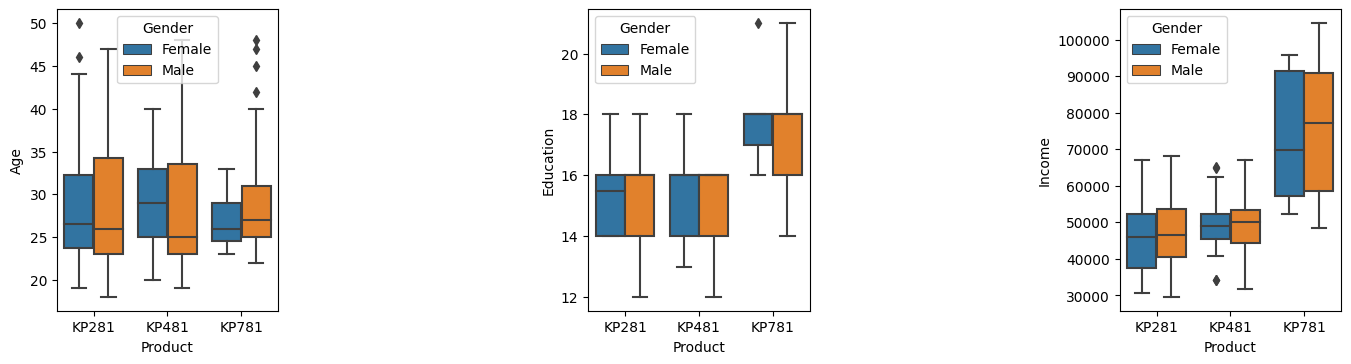

In [ ]:
#outliers detection
plt.figure(figsize=(20,18))
plt.subplot(4,6,1)
sns.boxplot(data=new_data,x='Product',y='Age',hue='Gender')
plt.subplot(4,6,3)
sns.boxplot(data=new_data,x='Product',y='Education',hue='Gender')
plt.subplot(4,6,5)
sns.boxplot(data=new_data,x='Product',y='Income',hue='Gender')

**Business Insight 6**
1. There are not much outliers except for few, some people with KP781 has much higher age.

<Axes: xlabel='Usage', ylabel='count'>

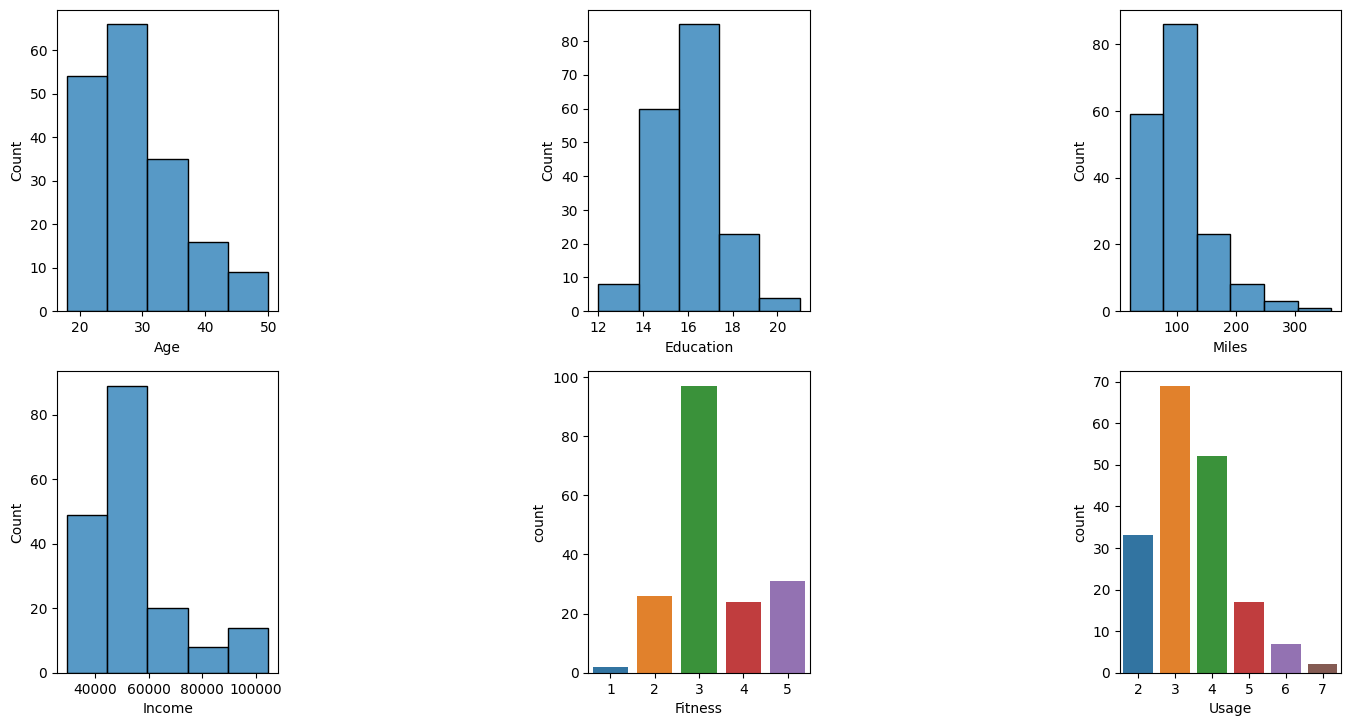

In [ ]:
plt.figure(figsize=(20,18))
plt.subplot(4,6,1)
sns.histplot(data=new_data,x='Age',bins=5)
plt.subplot(4,6,3)
sns.histplot(data=new_data,x='Education',bins=5)
plt.subplot(4,6,5)
sns.histplot(data=new_data,x='Miles',bins=6)
plt.subplot(4,6,7)
sns.histplot(data=new_data,x='Income',bins=5)
plt.subplot(4,6,9)
sns.countplot(data=new_data,x='Fitness')
plt.subplot(4,6,11)
sns.countplot(data=new_data,x='Usage')

**Business Insight 7**
1. Most of the people have age between 25 to 32 yrs.
2. Most of the people have education of 15 to 17 yrs.
3. Most of the people have covered between 80 to 130 miles in a week.
and have used 3hrs to 4hrs per week.
4. Most of the people have Annual Income between 45000 to 60000.
5. Most of the people are on Fitness level 3.

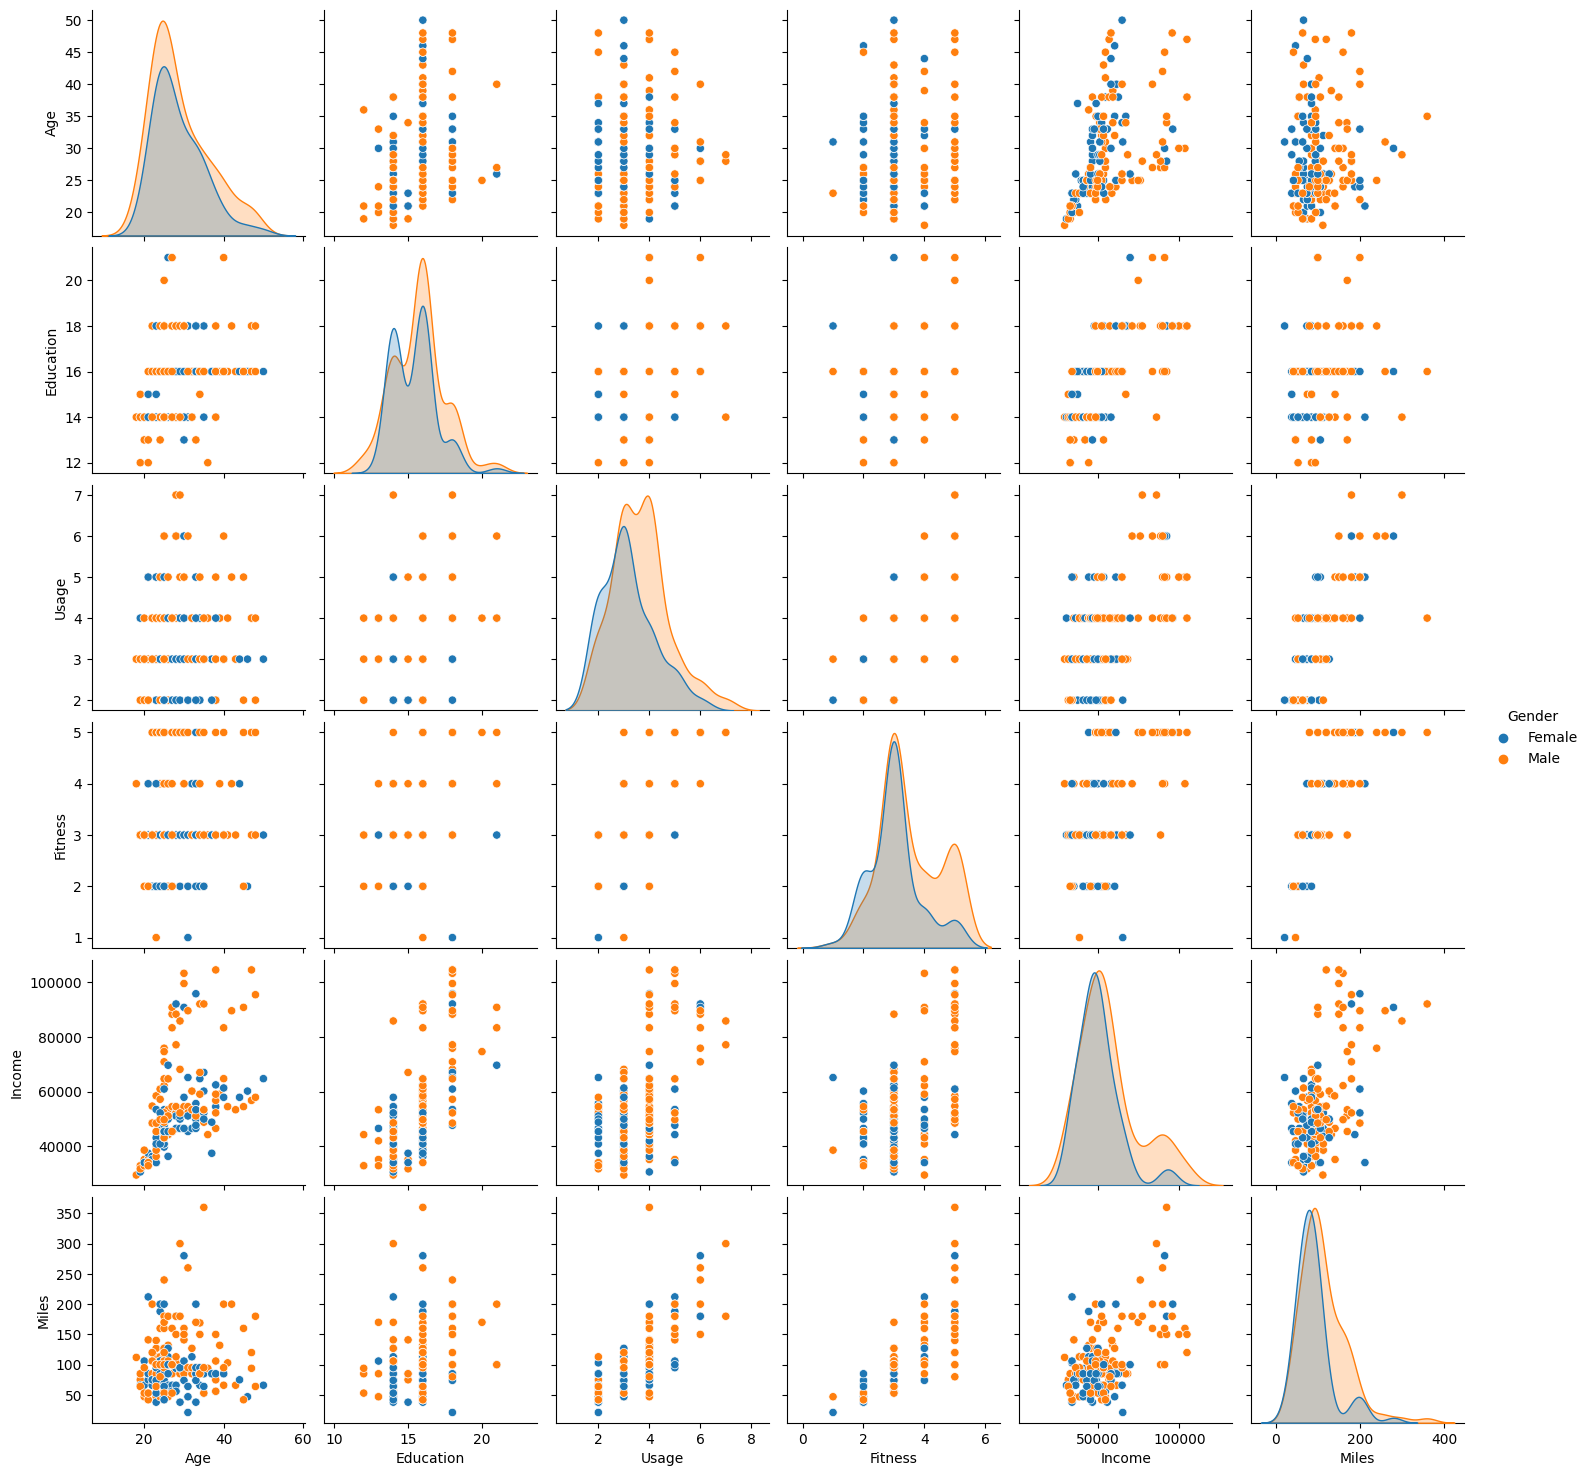

In [ ]:
sns.pairplot(new_data,hue='Gender')

**Business Insight 8**

1. Most of the data lies in the range of 20 to 30 yrs of age


**Recommendations Based on the above data**
1. Product Focus:

Given that KP281 is popular among both genders and purchased the most, consider focusing on this product for marketing efforts and potentially expanding its features or variations to maintain its popularity.
Consider investigating why KP781 is least preferred and whether there are any opportunities for adjustment in its Price.

2. Targeting Married Customers:

Since KP281 is favored by both married and single individuals, tailor your marketing campaigns to highlight the benefits for both groups.

3. Age Group Specific Strategies:

Capitalize on the popularity of KP281 among different age groups by creating targeted marketing content that highlights its benefits for each age category.
Consider offering incentives or personalized recommendations to the age group (28-38 years) that prefers KP481 to bridge the popularity gap.

4. Income-Based Segmentation:

Use the income-based insights to create pricing strategies that align with the income ranges of your customers. For example, offer flexible payment options or discounts for products that are more popular within specific income brackets.

5. Gender-Targeted Marketing:

Since there's a high probability of a randomly chosen person being male, consider tailoring some of your marketing content to specifically address male preferences and needs.

6. Addressing Outliers:

Investigate the outliers where people with KP781 have much higher ages. This might indicate a specific customer segment that you can further explore and understand.

7. Education and Fitness Level Alignment:

Leverage the insight about education levels and fitness levels to create content that resonates with these segments. For example, educational content related to fitness routines or benefits of your products.